In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from dmba import plotDecisionTree, textDecisionTree

In [3]:
data = pd.read_csv('./data/heart_cleveland.csv')
data.rename(columns={'trestbps': 'restbps', 'thalach':'MaxHeartRate'}, inplace = True)
data.head()

,age,sex,cp,restbps,chol,fbs,restecg,MaxHeartRate,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [5]:
grouped = data.groupby('condition').aggregate({'age': np.mean, 'restbps': np.mean, 'chol': np.mean,
                                     'MaxHeartRate': np.mean, 'oldpeak': np.mean})
grouped = grouped.transpose()
grouped.columns = ['NoHeartDisease', 'HeartDisease']

grouped['Diff'] = grouped.HeartDisease - grouped.NoHeartDisease
grouped

,NoHeartDisease,HeartDisease,Diff
age,52.64375,56.759124,4.115374
restbps,129.17500,134.635036,5.460036
chol,243.49375,251.854015,8.360265
MaxHeartRate,158.58125,139.109489,-19.471761
oldpeak,0.59875,1.589051,0.990301


## Permutation Tests

In [6]:
heart_dis_num = data.condition.value_counts().loc[1]

In [7]:
def perm_fun_mean(df, col, len_a):
    a = df.sample(n = len_a, replace = False)
    b = df[~df.index.isin(a.index)]
    
    return a[col].mean() - b[col].mean()

### Categorial Variable Exploration

### Continuous Variable Exploration

### Age

In [8]:
diffs = [perm_fun_mean(data, 'age', heart_dis_num) for _ in range(1000)]
actual_diff = grouped.iloc[0][1] - grouped.iloc[0][0]

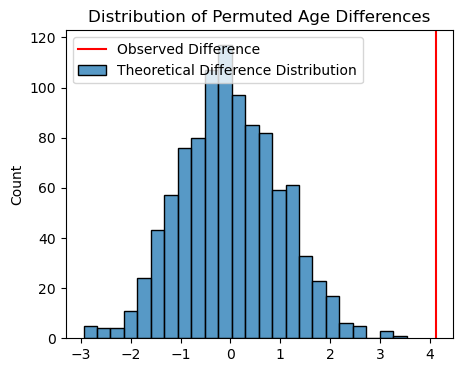

In [9]:
plt.figure(figsize = (5,4))

sns.histplot(diffs, label = 'Theoretical Difference Distribution')
plt.axvline(x = actual_diff, color = 'red', label = 'Observed Difference')

plt.title('Distribution of Permuted Age Differences')
plt.legend()
plt.show()

In [10]:
p_val = [0 if actual_diff > np.abs(diff) else 1 for diff in diffs]
np.mean(p_val)

0.0

### Resting Blood Pressure

In [11]:
diffs = [perm_fun_mean(data, 'restbps', heart_dis_num) for _ in range(1000)]
actual_diff = grouped.iloc[1][1] - grouped.iloc[1][0]

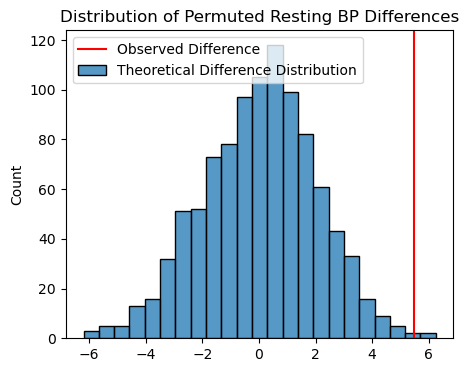

In [12]:
plt.figure(figsize = (5,4))

sns.histplot(diffs, label = 'Theoretical Difference Distribution')
plt.axvline(x = actual_diff, color = 'red', label = 'Observed Difference')

plt.title('Distribution of Permuted Resting BP Differences')
plt.legend()
plt.show()

In [13]:
p_val = [0 if actual_diff > np.abs(diff) else 1 for diff in diffs]
np.mean(p_val)

0.007

### Cholestorol

In [14]:
diffs = [perm_fun_mean(data, 'restbps', heart_dis_num) for _ in range(1000)]
actual_diff = grouped.iloc[2][1] - grouped.iloc[2][0]

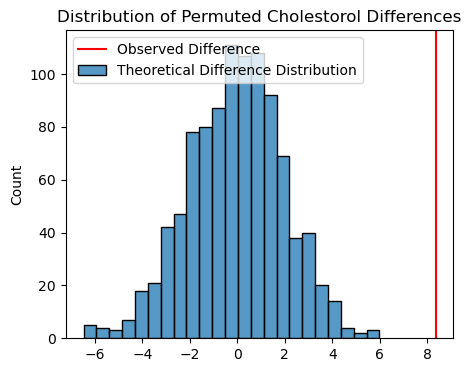

In [15]:
plt.figure(figsize = (5,4))

sns.histplot(diffs, label = 'Theoretical Difference Distribution')
plt.axvline(x = actual_diff, color = 'red', label = 'Observed Difference')

plt.title('Distribution of Permuted Cholestorol Differences')
plt.legend()
plt.show()

In [16]:
p_val = [0 if actual_diff > np.abs(diff) else 1 for diff in diffs]
np.mean(p_val)

0.0

### Max Heart Rate

In [17]:
diffs = [perm_fun_mean(data, 'MaxHeartRate', heart_dis_num) for _ in range(1000)]
actual_diff = grouped.iloc[3][1] - grouped.iloc[3][0]

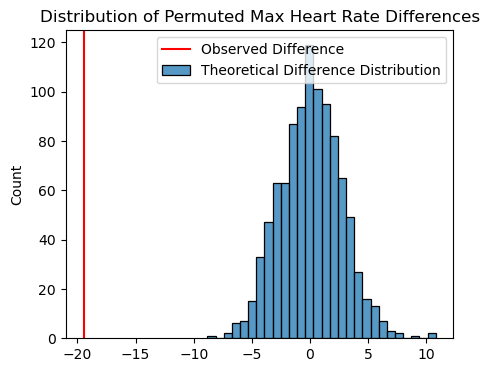

In [18]:
plt.figure(figsize = (5,4))

sns.histplot(diffs, label = 'Theoretical Difference Distribution')
plt.axvline(x = actual_diff, color = 'red', label = 'Observed Difference')

plt.title('Distribution of Permuted Max Heart Rate Differences')
plt.legend()
plt.show()

In [19]:
p_val = [0 if actual_diff < np.abs(diff) else 1 for diff in diffs]
np.mean(p_val)

0.0

### Old Peak

In [20]:
# ST depression induced by exercise relative to rest

diffs = [perm_fun_mean(data, 'oldpeak', heart_dis_num) for _ in range(1000)]
actual_diff = grouped.iloc[4][1] - grouped.iloc[4][0]

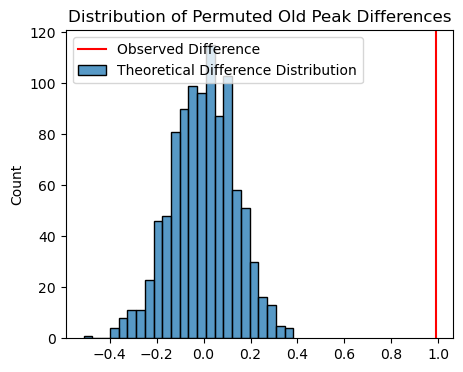

In [21]:
plt.figure(figsize = (5,4))

sns.histplot(diffs, label = 'Theoretical Difference Distribution')
plt.axvline(x = actual_diff, color = 'red', label = 'Observed Difference')

plt.title('Distribution of Permuted Old Peak Differences')
plt.legend()
plt.show()

In [22]:
p_val = [0 if actual_diff > np.abs(diff) else 1 for diff in diffs]
np.mean(p_val)

0.0

### Modeling

In [23]:
data.head()

,age,sex,cp,restbps,chol,fbs,restecg,MaxHeartRate,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [24]:
predictors = ['age', 'restbps', 'chol', 'MaxHeartRate', 'oldpeak']
outcome = 'condition'

X = data[predictors]
y = data[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 42)

rf = RandomForestClassifier(n_estimators = 500, random_state = 1, max_features = 'sqrt', min_samples_split = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=500, random_state=1)

In [25]:
df_test = pd.merge(X_test, y_test, left_index = True, right_index = True)
df_test['RFPrediction'] = rf.predict(df_test[predictors])
print(classification_report(y_test, df_test['RFPrediction']))

              precision    recall  f1-score   support

           0       0.65      0.53      0.59        32
           1       0.56      0.68      0.61        28

    accuracy                           0.60        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.61      0.60      0.60        60

